# Pachete necesare pentru folosirea acestui Notebook

Vom folosi [scipy](https://scipy.org/), [numpy](https://numpy.org/) și [matplotlib](https://matplotlib.org/).

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc, ndimage
from scipy.fft import dctn, idctn
import warnings

warnings.filterwarnings("ignore")

# Imaginea cu care lucrăm

Vom folosi o imagine din setul de date oferit implicit de către scipy.

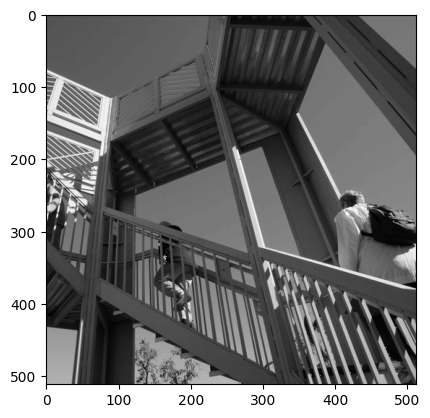

In [12]:
X = misc.ascent()
plt.imshow(X, cmap=plt.cm.gray)
plt.show()

# Transformata DCT a unei imagini

Transformata DCT se extinde la mai multe dimensiuni similar cu transformata DFT. Pentru un semnal bidimensional, precum o imagine, DCT-II devine:

$$
Y_{m_1,m_2} = \sum_{n_1=0}^{N_1-1}
              \sum_{n_2=0}^{N_2-1}
              x_{n_1,n_2}
              \cos\left[\frac{\pi}{N_1}m_1
                \left(n_1 + \frac12\right)\right]
              \cos\left[\frac{\pi}{N_2}m_2\left(n_2 + \frac12\right)\right]
$$

* unde $n_1$ și $n_2$ sunt pozițile pixelilor pe orizontală, respectiv, pe verticală
* bin-urile rezultate corespund pozițiilor pixelilor
* spectrul este în continuare simetric și par
* proprietățile transformatei DCT-II sunt respectate și în cazul celei 2D

În Python avem rutina `scipy.fft.dct` pentru 1D și `scipy.fft.dctn` pentru generalizarea la semnale $n$-dimensionale. Dimensiunea este determinată automat după forma semnalului; tipul DCT poate fi specificat prin atributul `type` (implicit II).

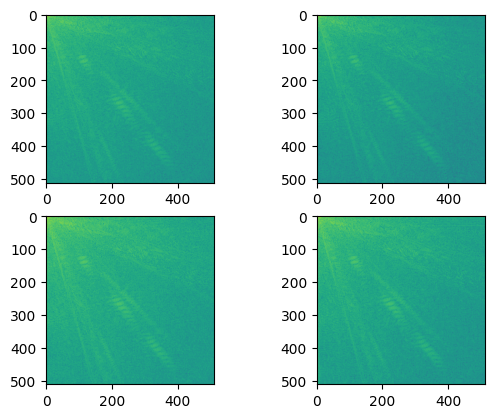

In [13]:
Y1 = dctn(X, type=1)
Y2 = dctn(X, type=2)
Y3 = dctn(X, type=3)
Y4 = dctn(X, type=4)
freq_db_1 = 20*np.log10(abs(Y1))
freq_db_2 = 20*np.log10(abs(Y2))
freq_db_3 = 20*np.log10(abs(Y3))
freq_db_4 = 20*np.log10(abs(Y4))

plt.subplot(221).imshow(freq_db_1)
plt.subplot(222).imshow(freq_db_2)
plt.subplot(223).imshow(freq_db_3)
plt.subplot(224).imshow(freq_db_4)
plt.show()

# Compactarea energiei. Compresie.

Putem profita de proprietatea compresiei energiei prin anularea frecvențelor DCT începând cu *bin*-ul `k` după care aplicăm transformata DCT inversă (similar cu tema anterioară):

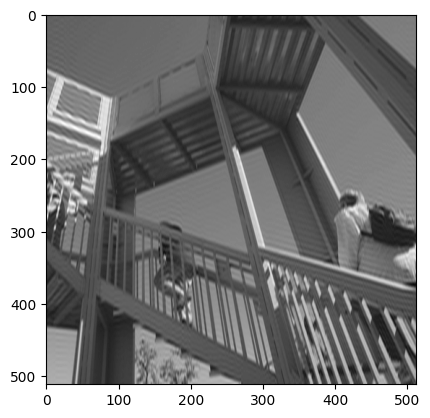

In [14]:
k = 120

Y_ziped = Y2.copy()
Y_ziped[k:] = 0
X_ziped = idctn(Y_ziped)

plt.imshow(X_ziped, cmap=plt.cm.gray)
plt.show()

# JPEG

Algoritmul de compresie JPEG are patru etape:

1. transformarea imaginii din pixeli RGB în Y'CbCr
2. aplicarea 2D-DCT pe blocuri disincte de 8x8 pixeli din imagine
3. cuantizarea în frecvență cu $Q$ dat de standardul JPEG
4. opțional compresia rezultatului cu coduri Huffman

Unde matricea JPEG de cuantizare $Q$ este:
$$
Q =
\begin{bmatrix}
16 & 11 & 10 & 16 & 24 & 40 & 51 & 61 & \\
12 & 12 & 14 & 19 & 26 & 28 & 60 & 55 & \\
14 & 13 & 16 & 24 & 40 & 57 & 69 & 56 & \\
14 & 17 & 22 & 29 & 51 & 87 & 80 & 62 & \\
18 & 22 & 37 & 56 & 68 & 109 & 103 & 77 & \\
24 & 35 & 55 & 64 & 81 & 104 & 113 & 92 & \\
49 & 64 & 78 & 87 & 103 & 121 & 120 & 101\\
72 & 92 & 95 & 98 & 112 & 100 & 103 & 99\\
\end{bmatrix}
$$

Imaginea noastră de test este monocromă, deci nu necesită pasul 1, dar putem efectua o operație de *down-sampling* în preprocesare precum am prezentat la curs.

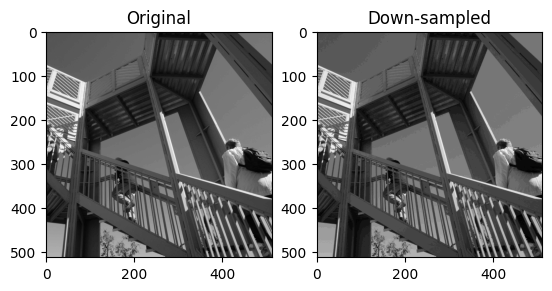

In [15]:
Q_down = 10

X_jpeg = X.copy()
X_jpeg = Q_down*np.round(X_jpeg/Q_down);

plt.subplot(121).imshow(X, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('Down-sampled')
plt.show()

Pentru fiecare bloc de $8\times 8$ aplică DCT și cuantizare.

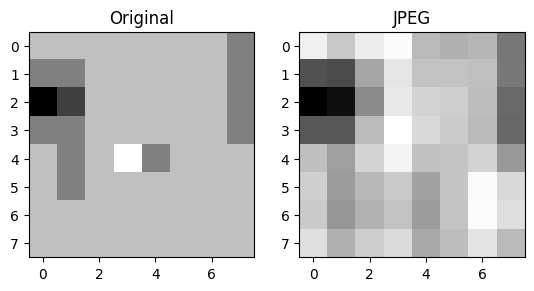

Componente în frecvență:64
Componente în frecvență după cuantizare: 14


In [16]:
Q_jpeg = [[16, 11, 10, 16, 24, 40, 51, 61],
          [12, 12, 14, 19, 26, 28, 60, 55],
          [14, 13, 16, 24, 40, 57, 69, 56],
          [14, 17, 22, 29, 51, 87, 80, 62],
          [18, 22, 37, 56, 68, 109, 103, 77],
          [24, 35, 55, 64, 81, 104, 113, 92],
          [49, 64, 78, 87, 103, 121, 120, 101],
          [72, 92, 95, 98, 112, 100, 103, 99]]

# Encoding
x = X[:8, :8]
y = dctn(x)
y_jpeg = Q_jpeg*np.round(y/Q_jpeg)

# Decoding
x_jpeg = idctn(y_jpeg)

# Results
y_nnz = np.count_nonzero(y)
y_jpeg_nnz = np.count_nonzero(y_jpeg)

plt.subplot(121).imshow(x, cmap=plt.cm.gray)
plt.title('Original')
plt.subplot(122).imshow(x_jpeg, cmap=plt.cm.gray)
plt.title('JPEG')
plt.show()

print('Componente în frecvență:' + str(y_nnz) + 
      '\nComponente în frecvență după cuantizare: ' + str(y_jpeg_nnz))

# Sarcini

1. [6p] Completați algoritmul JPEG incluzând toate blocurile din imagine.

2. [4p] Extindeți la imagini color (incluzând transformarea din RGB în Y'CbCr). Exemplificați pe `scipy.misc.face` folosită în tema anterioară.

3. [6p] Extindeți algoritmul pentru compresia imaginii până la un prag MSE impus de utilizator.

4. [4p] Extindeți algoritmul pentru compresie video. Demonstrați pe un clip scurt din care luați fiecare cadru și îl tratați ca pe o imagine.

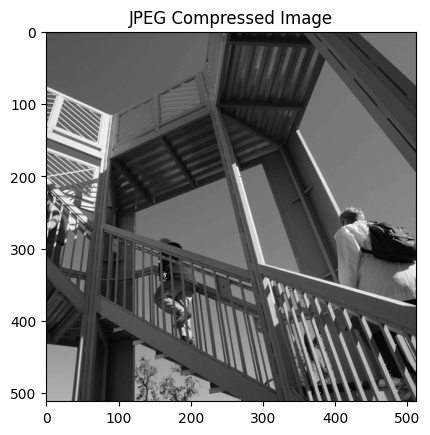

In [17]:
# Ex. 1
H, W = X.shape

# Parcurgerea fiecarui bloc de 8x8
for i in range(0, H, 8):
    for j in range(0, W, 8):
        # Extragerea blocului
        block = X[i:i+8, j:j+8]
        
        # DCT
        dct_block = dctn(block)
        quantized_block = np.round(dct_block / Q_jpeg) * Q_jpeg
        block_jpeg = idctn(quantized_block)
        X_jpeg[i:i+8, j:j+8] = block_jpeg

plt.imshow(X_jpeg, cmap=plt.cm.gray)
plt.title('JPEG Compressed Image')
plt.show()

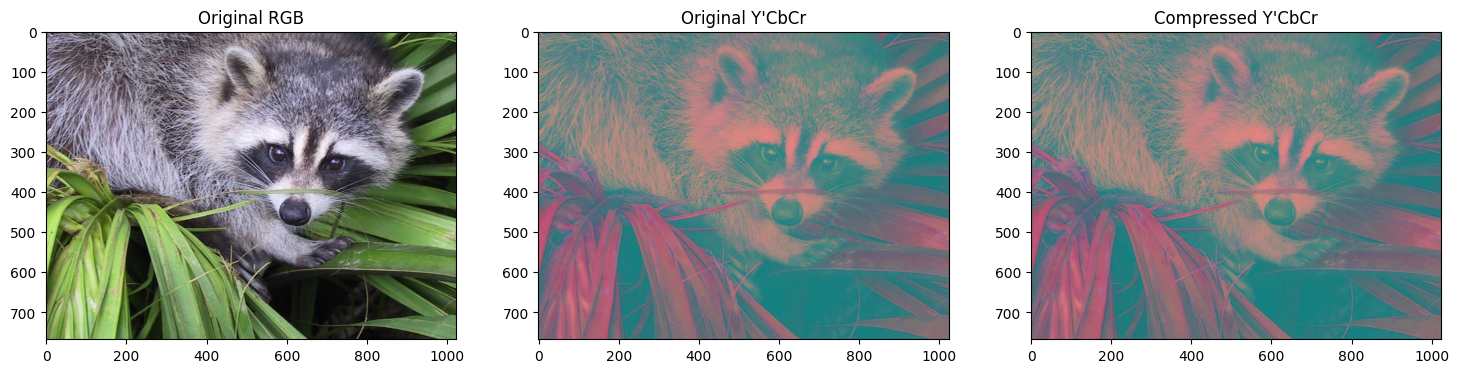

In [18]:
# Ex. 2
image_rgb = misc.face()

# Converteste din RGB în Y'CbCr (https://sistenix.com/rgb2ycbcr.html)
def rgb_to_ycbcr(image):
    Y = 16 + (65.738 * image[:,:,0] / 256) + (129.057 * image[:,:,1] / 256) + (25.064 * image[:,:,2] / 256)
    Cb = 128 - (37.945 * image[:,:,0] / 256) - (74.494 * image[:,:,1] / 256) + (112.439 * image[:,:,2] / 256)
    Cr = 128 + (112.439 * image[:,:,0] / 256) - (94.154 * image[:,:,1] / 256) - (18.285 * image[:,:,2] / 256)
    return np.stack((Y, Cb, Cr), axis=-1)

image_ycbcr = rgb_to_ycbcr(image_rgb)

def process_block(block):
    dct_block = dctn(block, type=2)
    quantized_block = np.round(dct_block / Q_jpeg)
    return quantized_block

def process_block_inverse(block):
    dequantized_block = block * Q_jpeg
    return idctn(dequantized_block, type=2)

# Procesarea unui canal
def process_channel(channel):
    height, width = channel.shape
    compressed_channel = np.zeros_like(channel)
    for i in range(0, height, 8):
        for j in range(0, width, 8):
            block = channel[i:i+8, j:j+8]
            compressed_block = process_block(block)
            compressed_channel[i:i+8, j:j+8] = process_block_inverse(compressed_block)
    return compressed_channel

# Aplicam procesul pentru toate cele 3 canale: Y, Cb, Cr
Y_compressed = process_channel(image_ycbcr[:,:,0])
Cb_compressed = process_channel(image_ycbcr[:,:,1])
Cr_compressed = process_channel(image_ycbcr[:,:,2])

# Le suprapunem ca sa generam imaginea finala
image_ycbcr_compressed = np.stack((Y_compressed, Cb_compressed, Cr_compressed), axis=-1)

plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB")
plt.subplot(1, 3, 2)
plt.imshow(np.uint8(image_ycbcr))
plt.title("Original Y'CbCr")
plt.subplot(1, 3, 3)
plt.imshow(np.uint8(image_ycbcr_compressed))
plt.title("Compressed Y'CbCr")
plt.show()

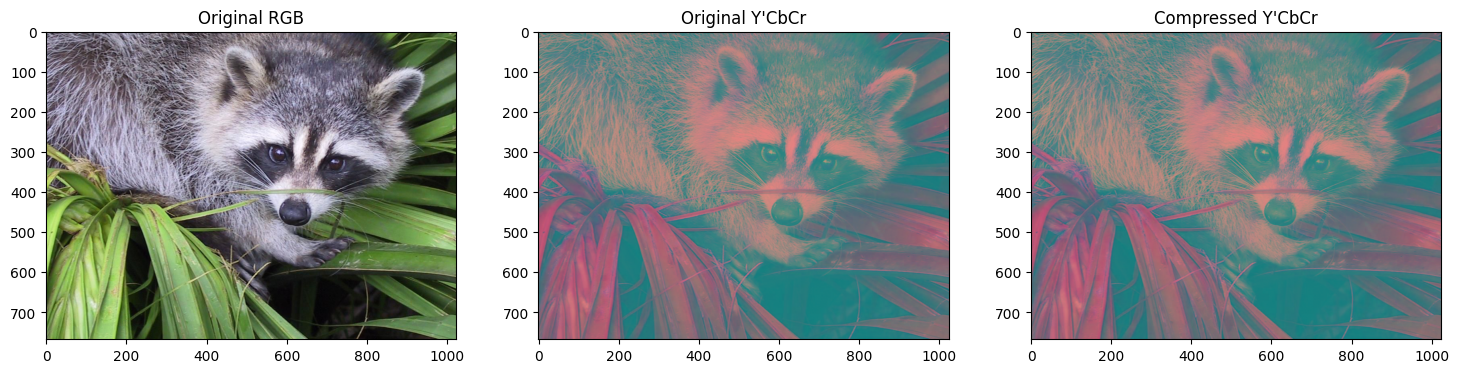

MSE pentru canalul Y: 0.009585521531989266
MSE pentru canalul Cb: 0.008939353684468071
MSE pentru canalul Cr: 0.00882772097107906


In [19]:
# Ex. 3
def calculate_mse(original, compressed):
    return np.mean((original - compressed) ** 2)

Q_jpeg = np.array([
    [16, 11, 10, 16, 24, 40, 51, 61],
    [12, 12, 14, 19, 26, 28, 60, 55],
    [14, 13, 16, 24, 40, 57, 69, 56],
    [14, 17, 22, 29, 51, 87, 80, 62],
    [18, 22, 37, 56, 68, 109, 103, 77],
    [24, 35, 55, 64, 81, 104, 113, 92],
    [49, 64, 78, 87, 103, 121, 120, 101],
    [72, 92, 95, 98, 112, 100, 103, 99]
])

def adjust_quantization_matrix(Q, factor):
    return Q * factor

def compress_to_mse_threshold(channel, mse_threshold):
    factor = 1.1
    
    mse = float('inf')
    while mse > mse_threshold:
        adjusted_Q = adjust_quantization_matrix(Q_jpeg, factor)
        compressed_channel = np.zeros_like(channel)
        height, width = channel.shape
        for i in range(0, height, 8):
            for j in range(0, width, 8):
                block = channel[i:i+8, j:j+8]
                dct_block = dctn(block, type=2)
                quantized_block = np.round(dct_block / adjusted_Q)
                dequantized_block = quantized_block * adjusted_Q
                compressed_channel[i:i+8, j:j+8] = idctn(dequantized_block, type=2)
        mse = calculate_mse(channel, compressed_channel)
        factor /= 1.1  # Ajustam factorul pentru a modifica gradul de compresie
    return compressed_channel, mse

# Aplicam procesul pentru toate cele 3 canale
mse_threshold = 0.01
Y_compressed, mse_Y = compress_to_mse_threshold(image_ycbcr[:,:,0], mse_threshold)
Cb_compressed, mse_Cb = compress_to_mse_threshold(image_ycbcr[:,:,1], mse_threshold)
Cr_compressed, mse_Cr = compress_to_mse_threshold(image_ycbcr[:,:,2], mse_threshold)

image_ycbcr_compressed = np.stack((Y_compressed, Cb_compressed, Cr_compressed), axis=-1)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title("Original RGB")

plt.subplot(1, 3, 2)
plt.imshow(np.uint8(image_ycbcr))
plt.title("Original Y'CbCr")

plt.subplot(1, 3, 3)
plt.imshow(np.uint8(image_ycbcr_compressed))
plt.title("Compressed Y'CbCr")
plt.show()

print(f"MSE pentru canalul Y: {mse_Y}")
print(f"MSE pentru canalul Cb: {mse_Cb}")
print(f"MSE pentru canalul Cr: {mse_Cr}")

In [20]:
# Ex. 4
import cv2 as cv2
video_path = 'ps-tema-3-ex-4-video-input.mp4' # https://file-examples.com/storage/fe602ed48f677b2319947f8/2017/04/file_example_MP4_1920_18MG.mp4

cap = cv2.VideoCapture(video_path)

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
seconds_to_process = 1

num_frames_to_process = min(int(fps * seconds_to_process), frame_count) # Numarul de cadre pe care sa le procesam. Limitam numarul de cadre pentru a reduce timpul de procesare.

# Definim codec-ul si cream un obiect VideoWriter
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('ps-tema-3-ex-4-video-output.avi', fourcc, fps, (frame_width, frame_height))

# Comprima un cadru
def compress_frame(frame):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # Convertim cadrul din BGR (OpenCV) in RGB

    # Aplicam compresia pe fiecare canal al fiecarui bloc de 8x8 pixeli
    compressed_frame = np.zeros_like(frame_rgb)
    for channel in range(3):
        for i in range(0, frame_rgb.shape[0], 8):
            for j in range(0, frame_rgb.shape[1], 8):
                block = frame_rgb[i:i+8, j:j+8, channel]
                compressed_block = process_block(block)
                decompressed_block = process_block_inverse(compressed_block)
                compressed_frame[i:i+8, j:j+8, channel] = decompressed_block
                
    compressed_bgr = cv2.cvtColor(compressed_frame.astype('uint8'), cv2.COLOR_RGB2BGR) # Convertim inapoi in BGR pentru OpenCV
    return compressed_bgr

# Citim si procesam fiecare cadru
frames_processed = 0
while cap.isOpened() and frames_processed < num_frames_to_process:
    ret, frame = cap.read()
    if not ret:
        break
    compressed_frame = compress_frame(frame) # Comprima cadru
    out.write(compressed_frame) # Scriem cadrul in videoclipul output
    frames_processed += 1 # Incrementam contorul de cadre procesate

# Dispose la obiecte
cap.release()
out.release()